<a href="https://colab.research.google.com/github/GMZepeda/machine-learning-practice/blob/main/regresion-lineal/regresion_univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

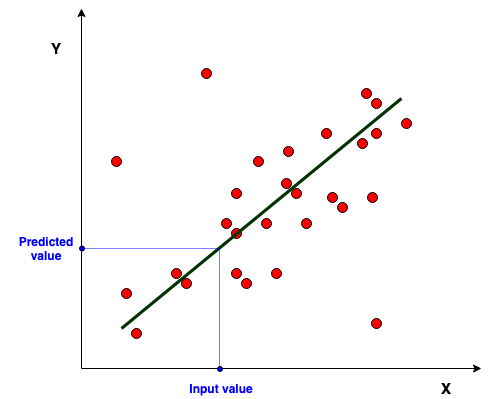

# **Regresión Univariada con Python**

La idea es tomar un conjunto de datos en un dataframe y realizar una regresion lineal, aprovechando para demostrar algunas caracteristicas de Python y bibliotecas comunes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

---
## **Acceso al dataset y visualizacion**

El dataset contiene información de años de experiencia (X) versus salario (Y), y se hipotetiza que X puede servir para predecir Y.

In [2]:
# Acceso al dataset
!wget "https://raw.githubusercontent.com/anujahlawat/salary-hike/main/Salary_Data.csv"

--2025-07-05 20:27:13--  https://raw.githubusercontent.com/anujahlawat/salary-hike/main/Salary_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454 [text/plain]
Saving to: ‘Salary_Data.csv’

Salary_Data.csv     100%[===================>]     454  --.-KB/s    in 0s      

2025-07-05 20:27:13 (22.2 MB/s) - ‘Salary_Data.csv’ saved [454/454]



In [3]:
# Acceso alternativo con gdown
import gdown
url = "https://raw.githubusercontent.com/anujahlawat/salary-hike/main/Salary_Data.csv"
gdown.download(url, 'salary.csv', quiet=False)

Downloading...
From: https://raw.githubusercontent.com/anujahlawat/salary-hike/main/Salary_Data.csv
To: /content/salary.csv
454B [00:00, 836kB/s]                    


'salary.csv'

In [4]:
df_data = pd.read_csv("Salary_Data.csv")
#data = pd.read_csv("salary.csv") # Carga en un CSV
print(df_data.shape)# Dimensiones
df_data.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df_data.describe() # Estadistica descriptiva

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
df_data['Promedio'] = df_data['Salary'] / df_data['YearsExperience']
df_data.head()

,YearsExperience,Salary,Promedio
0,1.1,39343.0,35766.363636
1,1.3,46205.0,35542.307692
2,1.5,37731.0,25154.000000
3,2.0,43525.0,21762.500000
4,2.2,39891.0,18132.272727


In [10]:
df_data.drop('Promedio', axis=1, inplace=True) # Borra la columna
df_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


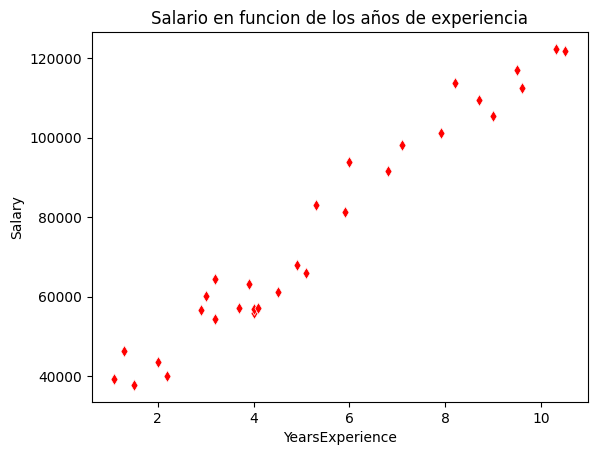

In [15]:
# Un primer grafico de puntos (usando seaborn)
sns.scatterplot(x=df_data['YearsExperience'],
                y=df_data['Salary'],
                color='red', marker='d')
plt.title("Salario en funcion de los años de experiencia")
plt.show()

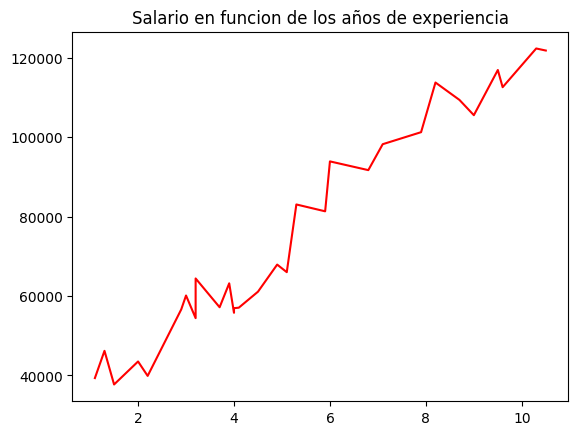

In [16]:
# Grafico de lineas (usando mathplotlib)
plt.plot(df_data['YearsExperience'],
         df_data['Salary'],
         color='red')
plt.title("Salario en funcion de los años de experiencia")
plt.show()

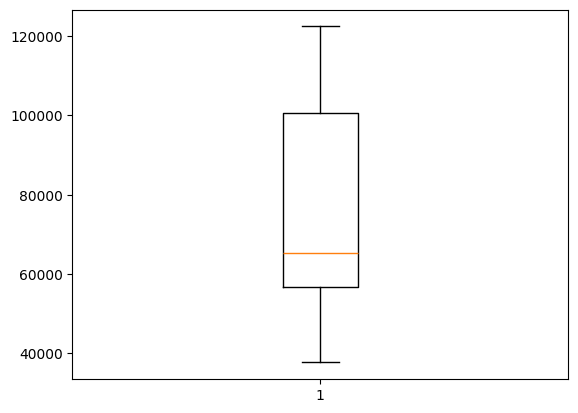

In [18]:
# Como boxplot
plt.boxplot(df_data['Salary'])
plt.show()

In [19]:
# Calculamos la correlacion entre ambas variables. Si es buena, entonces podriamos construir un modelo
correlation = df_data.corr() #if we got good correlation between x and y then we can go for model building
correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


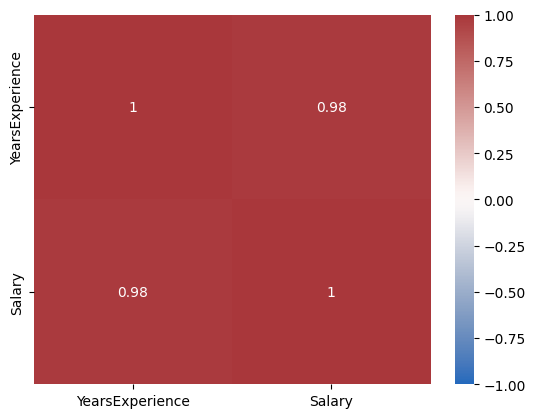

In [20]:
# Visualizacion alternativa de la correlacion como heatmap
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap="vlag")
plt.show()

## **Modelo de Regresion (*statsmodel*)**

In [23]:
df_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Aca voy a resolver la regresion con OLS

In [24]:
import statsmodels.formula.api as smf

# Salary (y) es una funcion lineal de YearsExperience (x)
model = smf.ols("Salary~YearsExperience", data=df_data).fit()
print(model.summary())

# we get a good value for R-squared
# null hypothesis: beta_1 (coeff. of YearsExperience) = 0
# alternative hypothesis: beta_1 != 0
# p-low  null-go, hence null hypothesis rejected and alternative hypothesis accepted
# This means that here is a relation between x and y

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.14e-20
Time:                        20:45:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

In [25]:
y_pred = model.predict(df_data["YearsExperience"])
#predicted_salary = pd.Series(data = y_pred, name='PredictedSalary')

df_data['PredictedSalary'] = y_pred
df_data.head()

,YearsExperience,Salary,PredictedSalary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [26]:
df_data

,YearsExperience,Salary,PredictedSalary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [27]:
print("min=", df_data['YearsExperience'].min(), "max=", df_data['YearsExperience'].max())

min= 1.1 max= 10.5


In [28]:
df_test = pd.DataFrame({'YearsExperience': [2.1, 25, 3405334, -2]})
df_test

,YearsExperience
0,2.1
1,25.0
2,3405334.0
3,-2.0


In [29]:
model.predict(df_test) # Predicting in-sample and out-of-sample

,0
0,4.563712e+04
1,2.620413e+05
2,3.218030e+10
3,6.892276e+03


In [31]:
# Grafico para ver los valores reales y predichos por el modelo
def mi_plot(x, y, y_pred):
  plt.scatter(x, y, color='red', label="actual")
  plt.scatter(x, y_pred, label="predicted")
  plt.plot(x, y_pred)

  #plt.title("Salario en funcion de años de experiencia - actual versus predicted")
  #plt.xlabel("YearsExperience")
  #plt.ylabel("Salary")
  plt.legend(loc="upper left")

  plt.show()

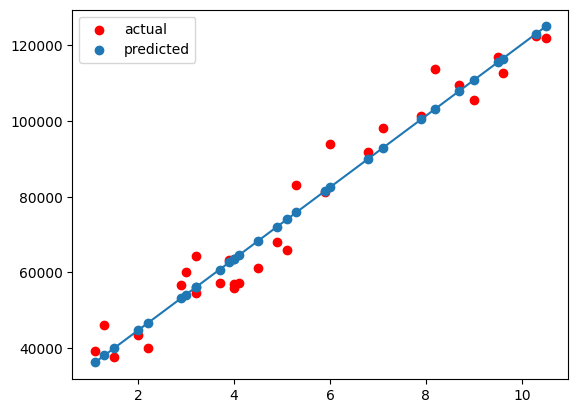

In [32]:
#plot(data) # Invocamos a la funcion
mi_plot(x=df_data['YearsExperience'], y=df_data['Salary'], y_pred=df_data['PredictedSalary'])

In [33]:
# Calculamos métricas de performance (R2 y RMSE)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

data = df_data
print("R2=", r2_score(df_data["Salary"], y_pred))
mse = mean_squared_error(df_data["Salary"], y_pred)
rmse = np.sqrt(mse)
print("MSE=", mse)
print("RMSE=", rmse)
print("MAE=", mean_absolute_error(df_data["Salary"], y_pred))

R2= 0.9569566641435086
MSE= 31270951.72228097
RMSE= 5592.043608760662
MAE= 4644.201289443538


<Axes: xlabel='Salary', ylabel='Count'>

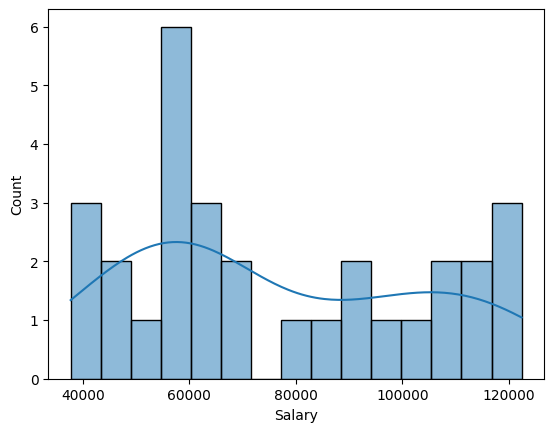

In [34]:
sns.histplot(data['Salary'], bins=15, kde=True)

<Axes: xlabel='YearsExperience', ylabel='Count'>

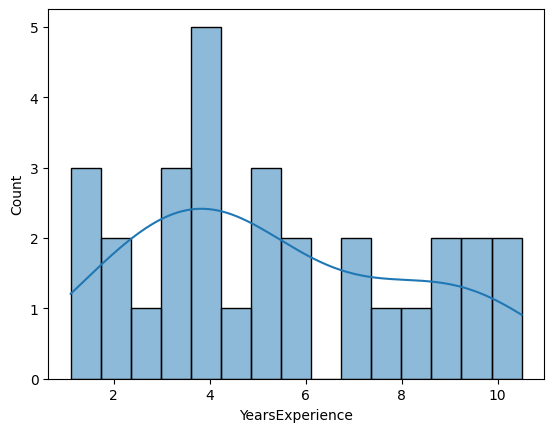

In [35]:
sns.histplot(data['YearsExperience'], bins=15, kde=True)

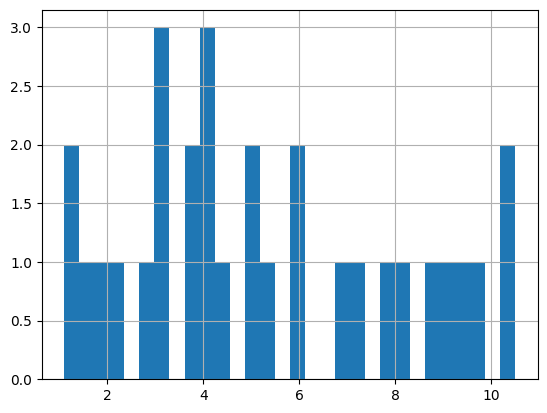

In [36]:
data['YearsExperience'].hist(bins=30)
plt.show()

## **Modelo de Regresion (*sklearn*)**

In [ ]:
data['YearsExperience'].values

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
from sklearn.linear_model import LinearRegression

x = data['YearsExperience'].values.reshape(-1,1) # If your data has a single feature
y = data['Salary'].values

model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)

In [ ]:
model

LinearRegression()

In [ ]:
data['PredictedSalary'] = y_pred
data

,YearsExperience,Salary,PredictedSalary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [ ]:
x1 = [30.5, 8, 14, -40.3]
values = np.array(x1).reshape(-1,1)

y_pred_value = model.predict(values)
print("prediction for years=", values[0][0], "is salary=", y_pred_value)

prediction for years= 30.5 is salary= [ 314016.05100305  101391.89877031  158091.67269904 -355041.28135597]


In [ ]:
#predicted_salary = pd.Series(data = pred,name='PredictedSalary')

data['PredictedSalary'] = y_pred
data.head()

,YearsExperience,Salary,PredictedSalary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


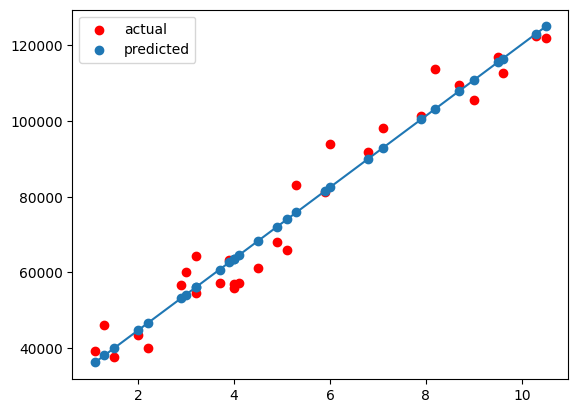

In [ ]:
mi_plot(data['YearsExperience'], data['Salary'], data['PredictedSalary'])

In [ ]:
print("R2=", r2_score(data["Salary"], y_pred))
mse = mean_squared_error(data["Salary"], y_pred)
rmse = np.sqrt(mse)
print("RMSE=", rmse)

R2= 0.9569566641435086
RMSE= 5592.043608760661


In [ ]:
model.predict(np.array([2.1]).reshape(-1,1)) # Prediction for a single value (YearsOfExperience) - Interpolation

array([45637.12107372])

In [ ]:
model.predict(np.array([0.5]).reshape(-1,1)) # Prediction for a single value (YearsOfExperience) - Extrapolation

array([30517.1813594])

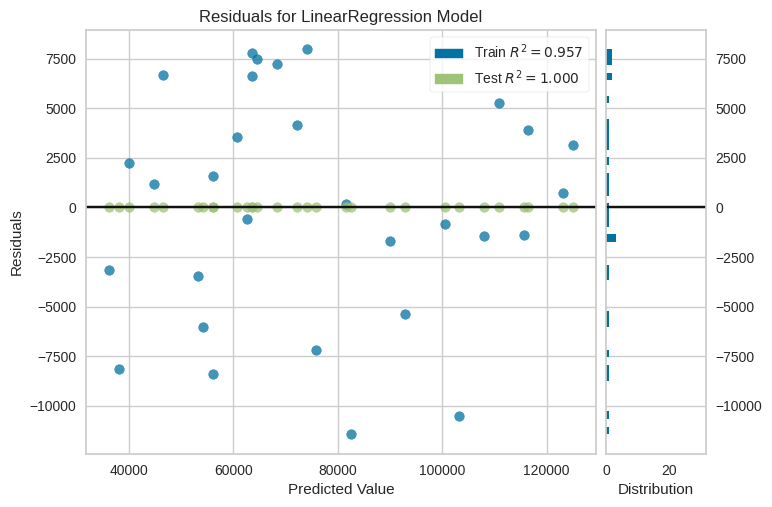

In [ ]:
# Queremos ver la distribucion de los errores residuales
# Nota: En este ejemplo NO vamos a tener division entre train y test sets
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(x, y) # Fit the training data to the visualizer
visualizer.score(x, y_pred) # Evaluate the model on the test data
visualizer.show() # Finalize and render the figure
plt.show()

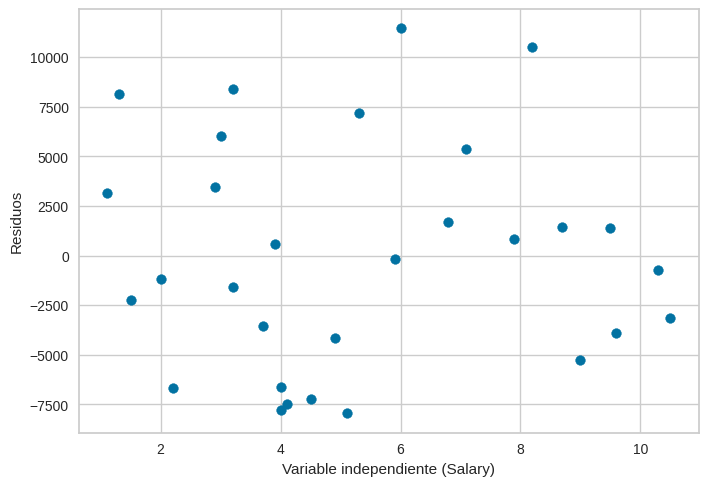

In [ ]:
# Podemos hacer también un plot manual de los residuos
residuals = data['Salary'] - y_pred

plt.scatter(y=residuals, x=data['YearsExperience'])
plt.ylabel('Residuos')
plt.xlabel('Variable independiente (Salary)')
plt.show()

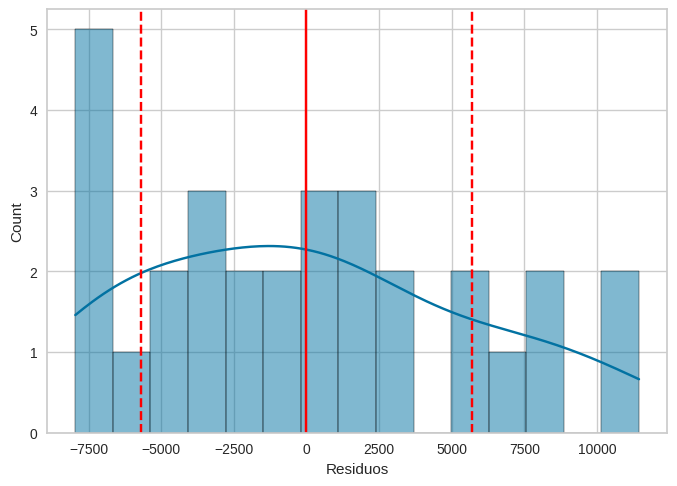

In [ ]:
# Distribucion de los residuos
sns.histplot(residuals, bins=15, kde=True)
plt.xlabel('Residuos')
mean = residuals.mean()
std = residuals.std()
#print(mean, std)
plt.axvline(x=mean,color='red', linestyle='-')
plt.axvline(x=mean+std,color='red', linestyle='--')
plt.axvline(x=mean-std,color='red', linestyle='--')
plt.show()

---
## **Ejercicio: Regresion con otro dataset (TODO)**

In [ ]:
import gdown

url = "https://raw.githubusercontent.com/BabesGotByte/DATA-MINING-Algorithms/main/ex1data1.txt"
gdown.download(url, 'population_profits.csv', quiet=False)

Downloading...
From: https://raw.githubusercontent.com/BabesGotByte/DATA-MINING-Algorithms/main/ex1data1.txt
To: /content/population_profits.csv
1.36kB [00:00, 2.26MB/s]                 


'population_profits.csv'

In [ ]:
data = pd.read_csv("population_profits.csv", header=None, names=['population', 'profit'])
print(data.shape)
data.head(10)

(97, 2)


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [ ]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
# TODO: Continuar con el procesamiento, la visualización, la predicción, y las métricas de performance
# Para empezar, veamos un primer grafico de puntos (usando seaborn)
sns.scatterplot(x=data['population'], y=data['profit'])
plt.title("Profit en función de population")
plt.show()

KeyError: 'population'

In [ ]:
data.corr() #if we got good correlation between x and y then we can go for model building

,population,profit
population,1.000000,0.837873
profit,0.837873,1.000000


In [ ]:
# TODO: Aplicar un modelo de regresion lineal y evaluar los resultados

# Profit (y) es una funcion lineal de Population (x)
model = sms.ols("profit~population", data=data).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.02e-26
Time:                        22:37:16   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8958      0.719     -5.415      0.0

---